In [3]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

C:\Users\ragop\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


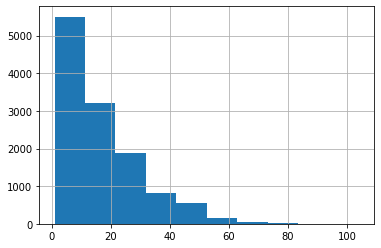

(12205, 104) (12205,)
(9764, 104) (9764, 5) (9764,)
(2441, 104) (2441, 5) (2441,)
77/77 [==============================] - 0s 4ms/step - loss: 0.0029
Results:  0.002875513629987836


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.22532338]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[1.4826486]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0

In [1]:
from keras.engine import sequential
import numpy as np
from string import punctuation
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import tensorflow.keras as k
import tensorflow.keras.layers as l
from sklearn.model_selection import train_test_split
import random


features_csv = pd.read_csv('features.csv')
labels_csv = pd.read_csv('lables.csv') # not labels
my_labels = np.array(labels_csv['Close'].tolist())

tweets = features_csv['clean_text'].tolist()

for s in range(len(tweets)):
    # print(type(tweets[s]), type("\n"))
    tweets[s] = str(tweets[s]) + "\n"
    # print(s)
data = np.array(tweets)

prior_days = features_csv['five_prior_close'].tolist()
pdays = []
for days in prior_days:
    string_days = days.strip('][').split(', ')
    for i in range(len(string_days)):
        string_days[i] = float(string_days[i])
    pdays.append(string_days)

context = np.array(pdays)


for i in range(data.shape[0]):
  data[i] = data[i].lower()
  # print(data[i])

all_text = ''.join([c for c in data if c not in punctuation])
# print(type(all_text))
reviews_split = all_text.split('\n')[0:-1]


all_text2 = ' '.join(reviews_split)
# create a list of words
words = all_text2.split()
# Count all the words using Counter Method
count_words = Counter(words)

total_words = len(words)
# print("SPLITHERE", reviews_split)
sorted_words = count_words.most_common(total_words)

vocab_to_int = {w:i for i, (w,c) in enumerate(sorted_words)}
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}
# print(vocab_to_int)

reviews_int = []
for review in reviews_split:
    r = [vocab_to_int[w] for w in review.split()]
    reviews_int.append(r)
# print(type(reviews_int), reviews_int)
max_words = np.max(np.max(reviews_int))
# print(max_words)
max_len = 0
for review in reviews_int:
    if len(review) > max_len:
        max_len = len(review)
# print(max_len)

reviews_len = [len(x) for x in reviews_int]
pd.Series(reviews_len).hist()
plt.show()
pd.Series(reviews_len).describe()

# get rid of long and short reviews
# reviews_int = [reviews_int[i] for i, l in enumerate(reviews_len) if l>0 ]
# my_labels = [my_labels[i] for i, l in enumerate(reviews_len) if l> 0 ]




def pad_features(reviews_int, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    '''
    features = np.zeros((len(reviews_int), seq_length), dtype = int)
    
    for i, review in enumerate(reviews_int):
        review_len = len(review)
        
        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length-review_len))
            new = zeroes+review
        elif review_len > seq_length:
            new = review[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features
features = np.array(pad_features(reviews_int, max_len))
len_feat = len(features)
my_labels = np.array(my_labels)


rs = random.randint(0,100)
print(features.shape, my_labels.shape)
train_x, test_x, train_y, test_y = train_test_split(features, my_labels, test_size=0.2, random_state=rs)
train_context, test_context, train_y, test_y = train_test_split(context, my_labels, test_size=0.2, random_state=rs)



'''
model = sequential()
model.add(Embedding(MAX_WORDS, OUTPUT_SIZE, input_length=example_length)) #(33,8,10)
model.add(LSTM)
model.add(dropout)
model.add(LSTM)
model.add(dropout)
# however many denses we want, concatenate with context model
dense
dropout
dense
compile
fit
evaluate
'''

print(train_x.shape, train_context.shape, train_y.shape)
print(test_x.shape, test_context.shape, test_y.shape)
# print(valid_x.shape, valid_context.shape, valid_y.shape)
in1 = l.Input(shape=[max_len])
in2 = l.Input(shape=[5])

# number of possible words, desired output shape, padded input length
m1 = l.Embedding(max_words, 8, input_length=max_len)(in1)
m1 = l.LSTM(4)(m1) # can be replaced with SimpleRNN
m1 = l.Dense(2, activation='relu')(m1)
m1 = l.BatchNormalization()(m1)
 
m2 = l.Dense(2, activation='relu')(in2)
m2 = l.BatchNormalization()(m2)

m = l.concatenate([m1,m2])
u = l.Dense(1, activation='relu')(m)

model = k.Model(inputs=[in1, in2], outputs=u)

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit([train_x, train_context], train_y, validation_split=0.25, epochs=1, batch_size=10)
results = model.evaluate([test_x, test_context],test_y)
print("Results: ", results)

pred = model.predict([test_x, test_context])

print('\n')
for item in pred:
  print(item)
print('\n')
for item in test_y:
  print(item)


In [7]:
test_x[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0, 15448,     7,     4,
        3312,   994,  8853,    25, 15449,    26,    69, 15450,   756,
         604,   480,     5,   415,  8854])